# Impact crater probability

After Stewart (1999). 

We'd like to know the probability of finding an impact crater of a certain size (or greater), within a given survey area (eg seismic survey area), recording a given period of time.

### Cratering rate

From Hughes (1998), for the Phanerozoic:

$$ \log{n} = -(11.67 \pm 0.21) - (2.01 \pm 0.13) \log{d} $$

where $n$ is the number of craters larger than diameter $d$ km produced on the Earth's surface per $\mathrm{km}^2$ per year (where 1 < $d$ < 500). 

In an interval of $t$ years, we expect:

$$ \lambda = tn $$

craters per $\mathrm{km}^2$.

The probability of $r$ impact structures of a given size or greater, within an area of interest $A$ $\mathrm{km}^2$ is therefore (Davis, 1986, expression 5.11):

$$ P(r) = \exp(-\lambda A) \frac{(\lambda A)^r}{r!} $$

### References

Davis, JC (1986). *Statistics and data analysis in geology*, 2nd ed. John Wiley & Sons, New York.

Hughes, DW (1998). The mass distribution of the crater-producing bodies. In: Grady, MM, Hutchison, R, McCall, GJH & Rothery, DA (eds), *Meteorites: Flux with time and impact effects.* Geological Society, London, *Special Publications* **140**, 31–42.

Stewart, SA (1999). Seismic interpretation of circular geological structures. *Petroleum Geoscience* **5**, p 273–285.

## Worked example

The Nadir crater, offshore Republic of Guinea, originally Tweeted by PGS on 1 August 2019, but since deleted.

The same crater was [recently published in Nature.](https://www.nature.com/articles/s43247-024-01700-4)

In [1]:
A = 50 * 50  # Approximate size of survey in km, given in Nature paper.

In [2]:
t = 500_000_000  # Period of time, pulled out of nowhere.

In [3]:
import numpy as np

d = np.linspace(1, 10)  # km diameter.

In [4]:
def flux(d):
    """
    Compute the number of expected craters of diameter d or greater.
    """
    return 10**(-11.67 - 2.01*np.log(d))

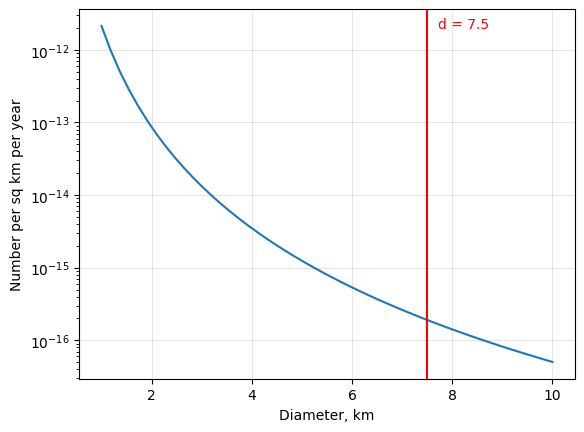

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

n = flux(d)

d_ = 7.5

plt.plot(d, n)

plt.yscale('log')
plt.xlabel("Diameter, km")
plt.ylabel("Number per sq km per year")
plt.axvline(d_, c='r')
plt.text(d_*1.03, 2e-12, f"d = {d_}", color='r')
plt.grid(color='k', alpha=0.1)
plt.show()

### Over a given time

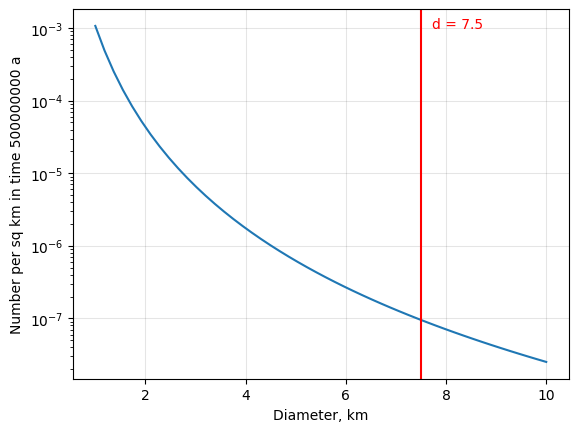

In [6]:
lamda = t * n

plt.plot(d, lamda)

plt.yscale('log')
plt.xlabel("Diameter, km")
plt.ylabel(f"Number per sq km in time {t} a")
plt.axvline(d_, c='r')
plt.text(d_*1.03, 1e-3, f"d = {d_}", color='r')
plt.grid(color='k', alpha=0.1)
plt.show()

### In a given area

In [7]:
import scipy.special as ss

def probability(lamda, A=1, r=1):
    return np.exp(-1 * lamda * A) * (lamda * A) / ss.factorial(r)

P1 = probability(lamda, A, r=1)

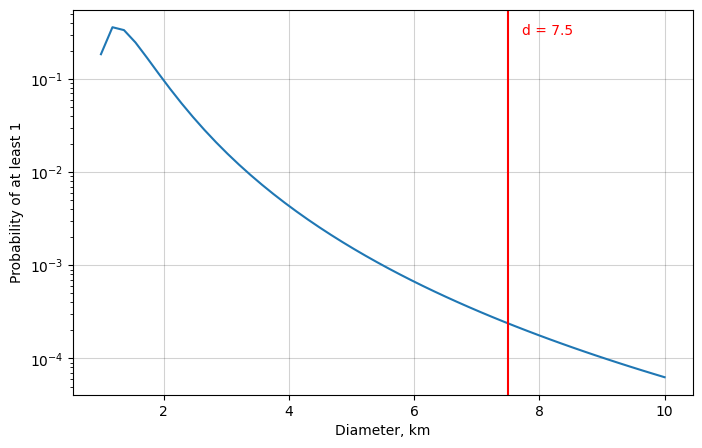

In [8]:
plt.figure(figsize=(8, 5))

plt.plot(d, P1)

plt.yscale('log')
plt.xlabel("Diameter, km")
plt.ylabel(f"Probability of at least 1")
plt.axvline(d_, c='r')
plt.text(d_*1.03, 0.3, f"d = {d_}", color='r')
plt.grid(color='k', alpha=0.175)
plt.show()

Specifically for a diameter of 7.5 km or greater...

In [9]:
A = 50 * 50  # Approximate size of survey in km, given in Nature paper.
d = 7.5
n = flux(d)
lamda = t * n

P = probability(lamda, A, r=1)
P

np.float64(0.0002381504956002489)

In [10]:
print(f"Probability of a crater {d}+ km or greater in this 3D survey: {100*P:.3f}%")

Probability of a crater 7.5+ km or greater in this 3D survey: 0.024%


Wow, it's really small.

## 2D seismic

We could consider the 2D seismic case: the survey is much larger, but its detecting power is smaller &mdash; especially if the line spacing is larger than the diameter of the thing we are looking for.

But we can be a bit generous and overlook this for the time being. Let's assume that if there's anything there, it will be detected.

In [11]:
A = 500 * 250  # square-km, estimated from map in the Nature paper.
d = 7.5
n = flux(d)
lamda = t * n
P = probability(lamda, A, r=1)
print(f"Probability of a crater {d}+ km or greater in this 2D survey: {100*P:.3f}%")

Probability of a crater 7.5+ km or greater in this 2D survey: 1.177%


## Bayesian combination with observation

The probabilities computed above are priors.

The observation comes from experts looking at high-quality seismic data. We can ascribe a reasonable probability to the interpretation being correct. Let's say reliability $R$ is 80%, does that sound reasonable? They are usually correct, but often wrong.

Then the updated probability is given by:

$$ P_{update} = \frac{R \times P}{R \times P + (1 - R) \times (1 - P)} $$

In [12]:
R = 0.80  # Reliability.
P_update = R * P / ((R * P + (1 - R) * (1 - P)))
print(f"Probability of a crater {d}+ km given a {100*R:.0f}% reliable observation: {100*P_update:.3f}%")

Probability of a crater 7.5+ km given a 80% reliable observation: 4.547%


---

© 2025 Matt Hall, licensed CC BY